<a href="https://colab.research.google.com/github/Tinddd28/labs-iadnmo-/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Лабораторная работа № 5 "Классификация на основе обработки текстовой информации. Сверточные и рекуррентные нейронные сети. Полносвязные сети с предобучением и дообучением."**

# 1. Начало работы: импорт библиотек, подготовка данных

Импорт библиотек

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

## Подготовка данных

Получение датасета, разделение на обучающую и валидационные выборки

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# Преобразование данных к "плоскому" (numpy) массиву
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

17464789/17464789 [==============================] - 0s 0us/step


# 2. Задание № 1. Создание двунаправленной LSTM рекуррентной сети

In [35]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(
        input_dim=10000,
        output_dim=128,
        # input_length=500,
    ),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units=64,
            activation="tanh",
            return_sequences=False,
        ),
    ),
    # tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(
        units=64,
        activation="relu",
    ),

    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid",
    )
])

In [36]:
lstm_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"],
)

In [37]:
callback_lstm = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        mode="max",
        patience=10,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="lstm_model.keras",
        monitor="val_acc",
        mode="max",
        save_best_only=True,
    ),
]

In [38]:
history_lstm = lstm_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=callback_lstm,
)

Epoch 1/10
625/625 [==============================] - 292s 462ms/step - loss: 0.4414 - acc: 0.7910 - val_loss: 0.3671 - val_acc: 0.8430
Epoch 2/10
625/625 [==============================] - 286s 457ms/step - loss: 0.2549 - acc: 0.9007 - val_loss: 0.3682 - val_acc: 0.8582
Epoch 3/10
625/625 [==============================] - 284s 455ms/step - loss: 0.1748 - acc: 0.9379 - val_loss: 0.3746 - val_acc: 0.8590
Epoch 4/10
625/625 [==============================] - 284s 455ms/step - loss: 0.1408 - acc: 0.9492 - val_loss: 0.4477 - val_acc: 0.8450
Epoch 5/10
625/625 [==============================] - 284s 454ms/step - loss: 0.0924 - acc: 0.9686 - val_loss: 0.4513 - val_acc: 0.8652
Epoch 6/10
625/625 [==============================] - 284s 455ms/step - loss: 0.0731 - acc: 0.9761 - val_loss: 0.5027 - val_acc: 0.8658
Epoch 7/10
625/625 [==============================] - 284s 454ms/step - loss: 0.0787 - acc: 0.9721 - val_loss: 0.4977 - val_acc: 0.8562
Epoch 8/10
625/625 [============================

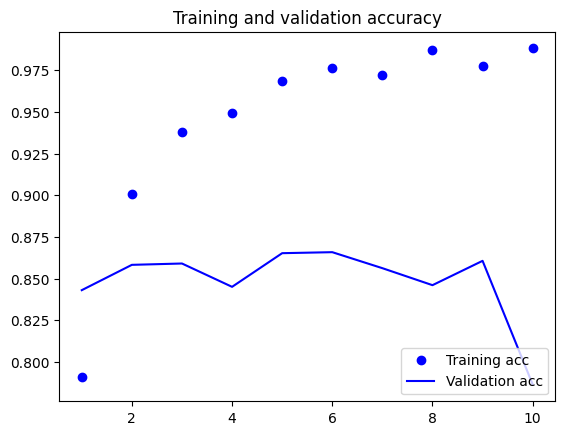

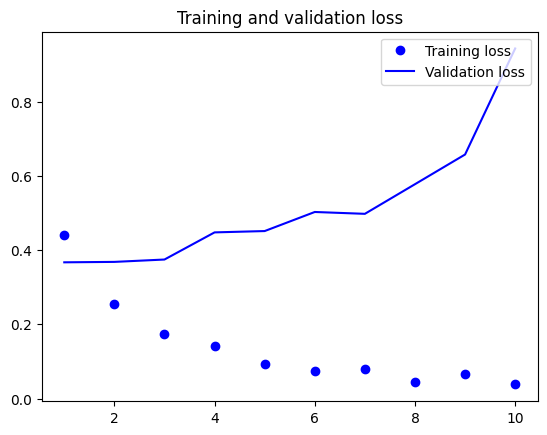

In [39]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')

plt.show()

In [40]:
best_model_lstm = tf.keras.models.load_model("lstm_model.keras")

In [46]:
loss, accuracy = best_model_lstm.evaluate(x_test, y_test)
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")

pred = best_model_lstm.predict(x_test)
pred_classes = (pred * 0.5).astype(int)

report = metrics.classification_report(y_test, pred_classes, target_names=["negative", "positive"])
print(report)

782/782 [==============================] - 83s 107ms/step - loss: 0.5225 - acc: 0.8580
Loss: 0.523
Accuracy: 0.858
782/782 [==============================] - 83s 106ms/step
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67     12500
    positive       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
y_pred_probs = lstm_model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(y_test, y_pred)
print("Тестовая")
print(f"F1 Score (общая): {f1:.4f}")

# F1 метрика для каждого класса
report = metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)


print("обучающая")
# Получение предсказаний
y_pred_probs = lstm_model.predict(x_train)
y_pred = (y_pred_probs > 0.5).astype(int)  # Преобразуем вероятности в классы
# Расчёт F1 метрики
f1 = metrics.f1_score(y_train, y_pred)
print(f"F1 Score (общая): {f1:.4f}")
report = metrics.classification_report(y_train, y_pred, target_names=['Negative', 'Positive'])
print(report)

782/782 [==============================] - 80s 102ms/step
Тестовая
F1 Score (общая): 0.8149
              precision    recall  f1-score   support

    Negative       0.89      0.66      0.76     12500
    Positive       0.73      0.92      0.81     12500

    accuracy                           0.79     25000
   macro avg       0.81      0.79      0.79     25000
weighted avg       0.81      0.79      0.79     25000

обучающая
782/782 [==============================] - 83s 106ms/step
F1 Score (общая): 0.9037
              precision    recall  f1-score   support

    Negative       0.98      0.81      0.89     12500
    Positive       0.84      0.98      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.91      0.90      0.89     25000
weighted avg       0.91      0.90      0.89     25000



# 3. Задание № 2. Полносвязная нейросетевая модель с предобучением без учителя с использованием автокодировщика

Функция для векторизации входных данных

In [50]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    results[i, seq] = 1
  return results

Создание обучающей выборки

In [52]:
vect_x_train = vectorize_sequences(x_train)
vect_x_test = vectorize_sequences(x_test)

vect_y_train = np.asarray(y_train).astype("float32")
vect_y_test = np.asarray(y_test).astype("float32")

x_val = vect_x_train[:10000]
part_x_val = vect_x_train[10000:]

y_val = vect_y_train[:10000]
part_y_val = vect_y_train[10000:]

In [ ]:
recurrent_encoder = tf.keras.models.Sequential([
    tf.keras.layers.
])